In [1]:
# imports
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

# Question 1
a) sample 1000 data points (x) from a uniform distribution over (1,10) and plot $$y=5x+2$$

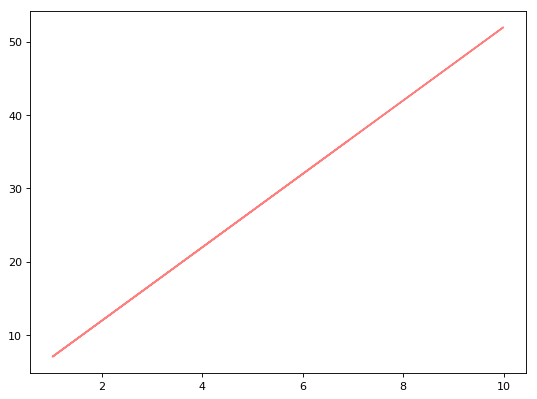

In [2]:
samples_x = np.random.uniform(1, 10, 1000)
samples_y = 5 * samples_x + 2

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.plot(samples_x, samples_y, c = 'red', alpha=0.5)
plt.show()

b) sample "noise" $n$ for each data point from $$\mathcal{N}\left(0,\sigma^2\right)$$ where $$\sigma^2=1$$ show the scatter plot $$y'=5\left(x+n\right)+2$$ against the plot of the previously defined y



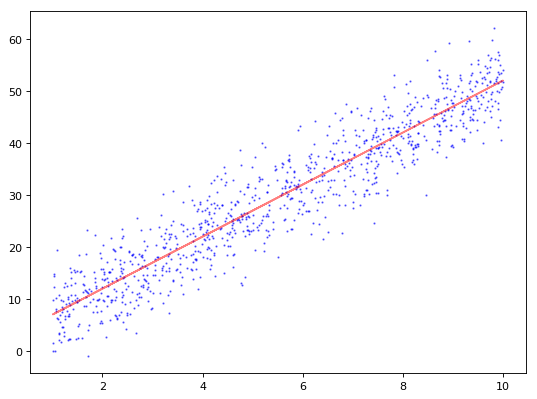

In [3]:
samples_noise = np.random.normal(0, 1, 1000)
samples_y_noise = 5* (samples_x + samples_noise) + 2

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.plot(samples_x, samples_y, c = 'red', alpha=0.5)
plt.scatter(samples_x, samples_y_noise, s=1, c = 'blue', alpha=0.5)
plt.show()

c) perform linear regression to generate $\hat{y}$ an approximation of $y$ from $(y',x)$. show a scatter plot of $y'$ against a plot of $y$, and $\hat{y}$

--

The following imports point to functions that may be useful to you. You can also solve the least squares problem using nothing by matrix arithmetic in numpy. 

The linear equation from the regression of noisy data is y = 4.98x + 2.02


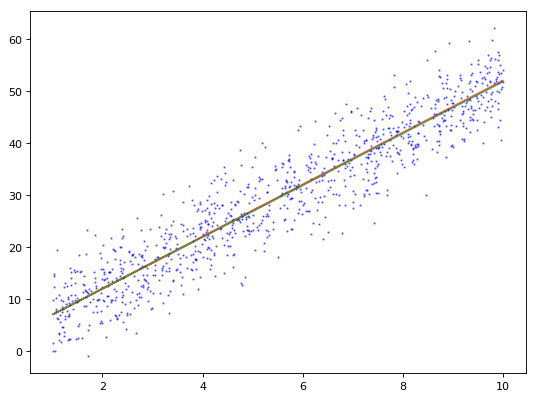

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = samples_x.reshape(-1, 1)
Y = samples_y_noise.reshape(-1, 1)

regressor = make_pipeline(PolynomialFeatures(1), LinearRegression())
regressor.fit(X, Y)

y_pred = regressor.predict(X)
print('The linear equation from the regression of noisy data is y = %.2fx + %.2f' % (regressor.steps[1][1].coef_.ravel()[1], regressor.steps[1][1].intercept_))

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.plot(samples_x, samples_y, c = 'red', alpha=0.5)
plt.scatter(samples_x, samples_y_noise, s=1, c = 'blue', alpha=0.5)
plt.plot(X, y_pred, c = 'green', alpha=0.5)
plt.show()

In the next cell are examples showing how to turn a "flat" numpy array to a row / column vector 

In [5]:
import numpy as np
a = np.array([1, 2, 3])
a_row_v = a[np.newaxis, :]
a_col_v = a[:, np.newaxis]
print(a.shape)
print(a_row_v.shape)
print(a_col_v.shape)

(3,)
(1, 3)
(3, 1)


d) compute the $r^2$ score and the square residual sum (RSS)

In [6]:
from sklearn.metrics import r2_score

In [7]:
R2 = r2_score(Y, y_pred)
RSS = ((Y-y_pred)**2).sum()
print('The r² score for this dataset is %.2f and RSS = %.2f' % (R2, RSS))

The r² score for this dataset is 0.88 and RSS = 22836.27


# Question 2
repeat for additive gaussian noise with $\sigma^2=2, 5, 10, 20 $. Are the estimated intercept and coefficient close to the true values? if not, why?

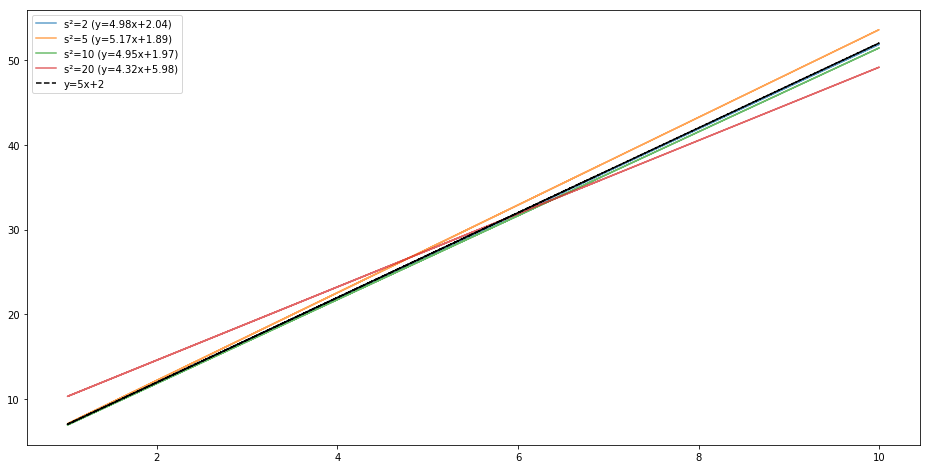

In [8]:
def regress_normal_errors(sigma_sq):
    gaussian_noise = np.random.normal(0, np.sqrt(sigma_sq), 1000)
    y = 5 * (samples_x + gaussian_noise) + 2
    
    X = samples_x.reshape(-1, 1)
    Y = y.reshape(-1, 1)

    regressor.fit(X, Y)

    y_pred = regressor.predict(X)
    #print('With 𝜎²= %d, the linear regression model finds y = %.2fx + %.2f' % (sigma_sq, regressor.steps[1][1].coef_.ravel()[1], regressor.steps[1][1].intercept_))

    plt.plot(X, y_pred, alpha=0.7, label='s²=%d (y=%.2fx+%.2f)' % (sigma_sq, regressor.steps[1][1].coef_.ravel()[1], regressor.steps[1][1].intercept_))
    plt.legend()

plt.figure(num=None, figsize=(16, 8))

_ = [regress_normal_errors(sigma_sq) for sigma_sq in [2,5,10,20]]
plt.plot(samples_x, samples_y, '--', c = 'black', label='y=5x+2')
plt.legend()
plt.show()


Increasing the 𝜎² of the noise increases the average error and makes an accurate prediction from the regression model less likely for the same sample size.

# Question 3
a) Load the data in lin_reg_data.csv to a pandas data frame, and perform a linear regression for the x column Vs. the y column. Print the intercept and coefficient. 

In [9]:
lin_reg_df = pd.read_csv('lin_reg.csv')
lr_x = lin_reg_df['x'].values.reshape(-1,1)
lr_y = lin_reg_df['y'].values.reshape(-1,1)

regressor.fit(lr_x, lr_y)
print('The linear equation from the regression of lin_reg.csv is y = %.2fx + %.2f' % (regressor.steps[1][1].coef_.ravel()[1], regressor.steps[1][1].intercept_))

The linear equation from the regression of lin_reg.csv is y = 0.57x + 15.98


b) Repeat for the first 90% of the rows. Are the results similar? 

In [10]:
n_data = int(0.9 * lin_reg_df.count()[0])
print('Performing linear regression of %d rows of %d total rows in file' % (n_data, lin_reg_df.count()[0]))
lr_x_90 = lin_reg_df['x'].iloc[:n_data].values.reshape(-1,1)
lr_y_90 = lin_reg_df['y'].iloc[:n_data].values.reshape(-1,1)

regressor.fit(lr_x_90, lr_y_90)
print('The linear equation from the regression of the first 90%% of rows is y = %.2fx + %.2f' % (regressor.steps[1][1].coef_.ravel()[1], regressor.steps[1][1].intercept_))

Performing linear regression of 45000 rows of 50000 total rows in file
The linear equation from the regression of the first 90% of rows is y = -3.01x + 10.02


The results are largely different, possibly indicating outliers in the last rows of the file.

c) Perform a regression for the first 90% of the points for x and y you generated in Q1. Are the results there similar to those of the regression performed on all points?

In [11]:
n_data = int(0.9 * len(samples_x))
X = samples_x[:n_data].reshape(-1, 1)
Y = samples_y_noise[:n_data].reshape(-1, 1)

regressor.fit(X, Y)
print('The linear equation from the regression of the first 90%% of points in Q1 is y = %.2fx + %.2f' % (regressor.steps[1][1].coef_.ravel()[1], regressor.steps[1][1].intercept_))

The linear equation from the regression of the first 90% of points in Q1 is y = 4.96x + 2.17


<font color='blue'><b>In this case the results are much closer to the results obtained in Q1.</font></b>

d) Plot the residuals for the regression performed on the all rows of the data frame

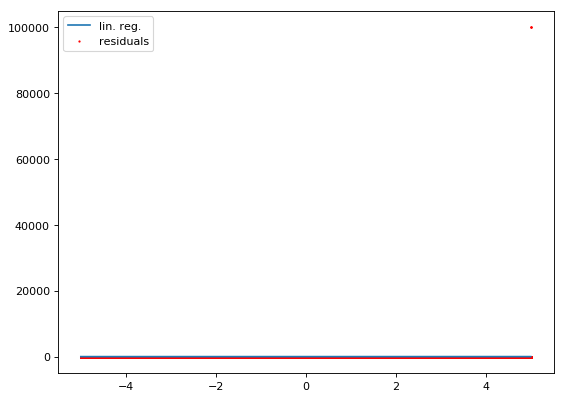

In [12]:
lr_x = lin_reg_df['x'].values.reshape(-1,1)
lr_y = lin_reg_df['y'].values.reshape(-1,1)

regressor.fit(lr_x, lr_y)
y_pred = regressor.predict(lr_x)
residuals = lr_y - y_pred

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.plot(lr_x, y_pred, label='lin. reg.')
plt.scatter(lr_x, residuals, c='red', s=1, label='residuals')
plt.legend()
plt.show()

e) plot a scatter plot of the x and y columns, can you explain this phenomenon?

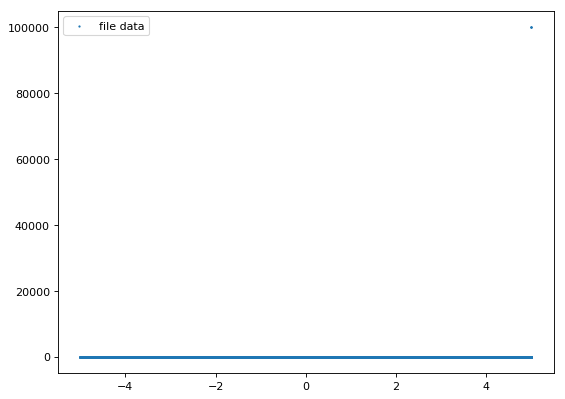

In [13]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.scatter(lr_x, lr_y, s=1, label='file data')
plt.legend()
plt.show()

As already sensed in question b) the presence of only one outlier negatively affected the linear regression. 
In this case, the outlier is so far away from the other data points that one point is enough to radically change the entire regression results.

It follows that data should always be explored and understood before applying a regression or classification model, otherwise the results could be completely biaised.